###### Application Exercises 2 -Iris Datasets - Logistic
##### Submitted by ASHISH SHARMA 500188494
####  This assignment is to predict iris species and compare metrics accuracy, precision, recall and create confusion matrix

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the dependencies
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd

#### Loading Iris Datasets

In [4]:
iris = datasets.load_iris()
X = iris.data
y = iris.target


In [5]:
# Names of features/columns in iris dataset
print(iris.feature_names)
Output : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
# Names of target/output in iris dataset
print(iris.target_names)
Output : ['setosa' 'versicolor' 'virginica']

['setosa' 'versicolor' 'virginica']


In [8]:
# size of feature matrix
print(iris.data.shape)
Output: (150, 4)

(150, 4)


In [9]:
# size of target vector
print(iris.target.shape)
Output : (150,)
#Iris target stored 150 values of iris species

(150,)


### Creating dataframe

In [10]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['Species']=iris.target

In [11]:
df['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [57]:

train_cols = df.columns[0:len(df.columns)-1]
train_cols
target_cols = df.columns[-1]
target_cols

'Species'

### Head Function

In [13]:
df.head()
## head function display top 5 elements.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Info Function provides information of datasets including datatype type and memory.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
Species              150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [15]:

# to display no. of samples on each class
df['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

#### Preprocessing the dataset

In [16]:
# check for null values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

#### Exploratory Data Analysis

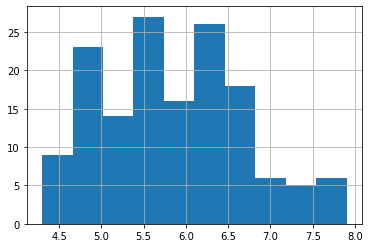

In [17]:
# histograms
df['sepal length (cm)'].hist()

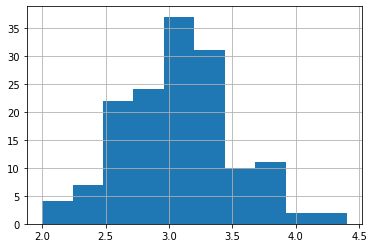

In [18]:
# histograms for sepal width
df['sepal width (cm)'].hist()

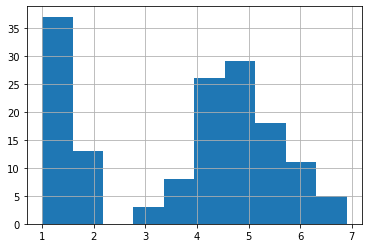

In [19]:
# histograms for petal length
df['petal length (cm)'].hist()

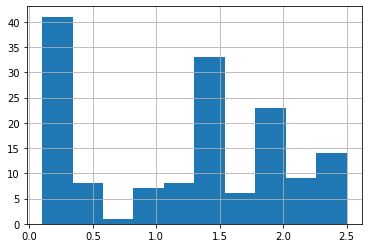

In [20]:
# histograms for petal Width
df['petal width (cm)'].hist()

In [21]:
# scatterplot
colors = ['red', 'orange', 'blue']
species = [0,1,2]

In [22]:
### This describes about each species having sepal length and petal length in range 

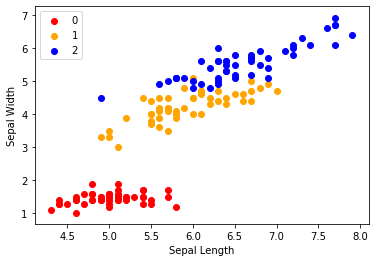

In [23]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['sepal length (cm)'], x['petal length (cm)'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

### Correlation Matrix
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two varibles have high correlation, we can neglect one variable from those tw

In [24]:

df.iloc[:, :-1].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


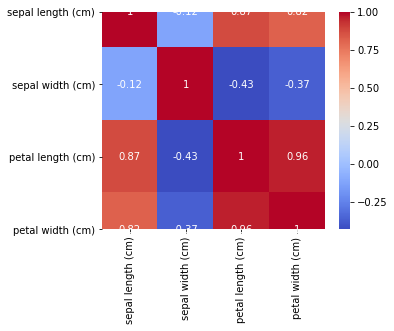

In [25]:
corr = df.iloc[:,:-1].corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [42]:
# import libraries for metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score

In [44]:
# train - 75
# test - 25
X = df.drop(columns=['Species'])
Y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25,random_state=0)

In [45]:
model = DecisionTreeClassifier()

In [46]:
# Fit the model
model.fit(X_train, y_train)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [47]:
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [48]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
#Splitter
splitter=['best','random']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]


# Create the random grid
random_grid = {'splitter': splitter,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'splitter': ['best', 'random'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [49]:
grid_search=GridSearchCV(estimator=model,param_grid=random_grid,cv=10,n_jobs=-1,verbose=2)
grid_fit=grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 2400 candidates, totalling 24000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done 5225 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 9753 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 15593 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 22713 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 24000 out of 24000 | elapsed:  2.6min finished
C:\Users\Ashish\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [52]:
best_grid=grid_search.best_estimator_

In [53]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[13  0  0]
 [ 0 16  0]
 [ 0  1  8]]
Accuracy Score 0.9736842105263158
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      1.00      0.97        16
           2       1.00      0.89      0.94         9

    accuracy                           0.97        38
   macro avg       0.98      0.96      0.97        38
weighted avg       0.98      0.97      0.97        38



In [54]:
def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

In [60]:
train_cols = df.columns[0:len(df.columns)-1]
target_cols = df.columns[-1]

In [61]:
plot_decision_tree(best_grid, train_cols, target_cols)

NameError: name 'StringIO' is not defined